#CoLab - 图像人脸检测_框出人脸

此文章教你如何使用谷歌Colaboratory实现静止图片的人脸识别和划框框。

##### CoLab最大好处：**GPU计算速度快！**

注：

· 国内登陆Colab需使用到梯梯才能使用；

· 初次接触Colab同学请先自行搜索熟悉基本操作；

· 同学们可自行尝试将代码放到Jetson Nano环境，或其他具备GPU环境运行​；

## **准备工作& 安装库**

### 1) CoLab开启GPU支持
上方菜单栏 ➡ 代码执行程序 ➡ 更改运行时类型 ➡ 笔记本设置 ➡ 硬件加速器：GPU

### 2) 安装：依赖项
通过apt安装一些基本库，为了支持numpy和dlib的运行
（注：CuLab内置已经有numpy）

In [ ]:
!sudo apt-get update
!sudo apt-get install python3-pip cmake libopenblas-dev liblapack-dev libjpeg-dev
!pip3 install numpy

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]      
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]    
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]    
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,749 kB]
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:12 https://developer.download.nvidia.com/compute/machine

### 3) 安装：Dlib深度学习库
大师Davis King创建的深度学习库，使得face_recognition库的运行效率大大提高。

下载dlib，解压代码，安装dlib
（CuLab环境下安装需10分钟左右，耐心等待一下）

In [ ]:
!wget http://dlib.net/files/dlib-19.17.tar.bz2 
!tar jxvf dlib-19.17.tar.bz2
!cd dlib-19.17;python setup.py install

--2020-01-04 06:51:54--  http://dlib.net/files/dlib-19.17.tar.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11271073 (11M) [application/x-tar]
Saving to: ‘dlib-19.17.tar.bz2’

dlib-19.17.tar.bz2  100%[===================>]  10.75M  5.80MB/s    in 1.9s    

2020-01-04 06:51:56 (5.80 MB/s) - ‘dlib-19.17.tar.bz2’ saved [11271073/11271073]

dlib-19.17/
dlib-19.17/ISSUE_TEMPLATE.md
dlib-19.17/MANIFEST.in
dlib-19.17/dlib/
dlib-19.17/dlib/config_reader/
dlib-19.17/dlib/config_reader/config_reader_thread_safe_1.h
dlib-19.17/dlib/config_reader/config_reader_thread_safe_abstract.h
dlib-19.17/dlib/config_reader/config_reader_kernel_1.h
dlib-19.17/dlib/config_reader/config_reader_kernel_abstract.h
dlib-19.17/dlib/smart_pointers_thread_safe.h
dlib-19.17/dlib/reference_counter.h
dlib-19.17/dlib/bridge.h
dlib-19.17/dlib/image_keypoint/
dlib-19.17/dlib/image_keypoint/build_sepa

### 4) 安装：人脸识别库 Face_recognition
以上完成之后，我们就开始安装人脸识别python库face_recognition啦：

In [ ]:
!sudo pip3 install face_recognition

     |████████████████████████████████| 100.2MB 90kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=23bb6a3840fa68490d6f86fa6201a290586e74df5255715a0121bcf79733e724
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


加载大神Adam Geitgey在GitHub的源代码文档

In [ ]:
!git clone https://github.com/ageitgey/face_recognition.git

Cloning into 'face_recognition'...
remote: Enumerating objects: 814, done.
remote: Total 814 (delta 0), reused 0 (delta 0), pack-reused 814
Receiving objects: 100% (814/814), 101.43 MiB | 24.62 MiB/s, done.
Resolving deltas: 100% (469/469), done.


## （一）**人脸划框框**（一步步教你玩）

加载人脸识别、OpenCV和MatPlotlib库

In [ ]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

首先我们先下载一张复仇联盟合照，将其图片Wget下载到“文件”根目录下，并修改命名为avengers_cast.jpeg


然后通过load_image_file可以将图片文件转变为数组数据，利用MatPlotlib的imshow来输出原图像。

--2020-01-04 07:38:32--  https://www.cheatsheet.com/wp-content/uploads/2019/05/The-Avengers-Cast-640x427.jpg
Resolving www.cheatsheet.com (www.cheatsheet.com)... 152.195.52.234
Connecting to www.cheatsheet.com (www.cheatsheet.com)|152.195.52.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46597 (46K) [image/jpeg]
Saving to: ‘avengers_cast.jpeg’

avengers_cast.jpeg  100%[===================>]  45.50K  --.-KB/s    in 0.004s  

2020-01-04 07:38:32 (10.2 MB/s) - ‘avengers_cast.jpeg’ saved [46597/46597]



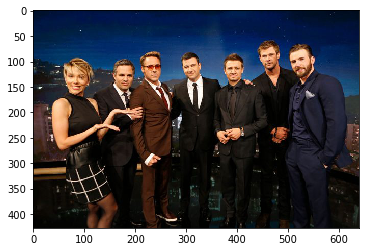

In [ ]:
!wget https://www.cheatsheet.com/wp-content/uploads/2019/05/The-Avengers-Cast-640x427.jpg -O avengers_cast.jpeg
image = face_recognition.load_image_file("/content/avengers_cast.jpeg") 
plt.imshow(image)

face_locations模块对图像数据进行处理，定位人脸位置：四值 ➡ 两坐标: y1,x1,y2,x2

In [ ]:
face_locations = face_recognition.face_locations(image)
#统计出一共多少人脸数
print("图像检测到人脸数：", len(face_locations))
#输出所有人脸定位数据
print (face_locations)

图像检测到人脸数： 7
[(118, 197, 154, 161), (98, 325, 134, 289), (98, 253, 134, 217), (103, 415, 146, 371), (84, 544, 127, 501), (78, 481, 114, 445), (118, 103, 161, 59)]


利用cv2的rectangle函数进行画框：参考函数讲解[OpenCV Python 2D绘制矩形](https://makeronsite.com/opencv-python-draw-rectangle.html)

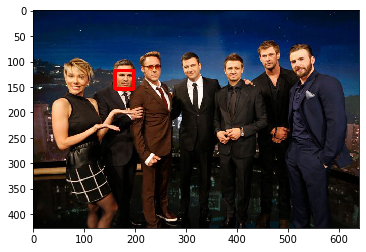

In [ ]:
#为第一个人脸画框(注意xy轴数值输入顺序)
img_test = cv2.rectangle(image, (face_locations[0][1], face_locations[0][0]), (face_locations[0][3], face_locations[0][2]), (255,0,0),5)
#输出效果图像
plt.imshow(img_test)

编写循环语句，为所有人脸画框：

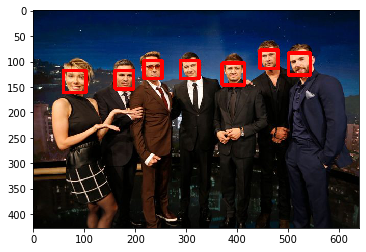

In [ ]:
#为所有人脸画框
for i in face_locations:
  img1_detect = cv2.rectangle(image, (i[1], i[0]), (i[3], i[2]),  (255,0,0),5)
#输出效果图像
plt.imshow(img1_detect)

接下来，我再找多个案例来试试：马爸爸与校友合照

--2020-01-04 07:40:51--  http://5b0988e595225.cdn.sohucs.com/images/20180513/0b958761ba0f4b99b35747ac656f4ec4.jpeg
Resolving 5b0988e595225.cdn.sohucs.com (5b0988e595225.cdn.sohucs.com)... 203.205.224.29, 203.205.224.26, 203.205.224.16, ...
Connecting to 5b0988e595225.cdn.sohucs.com (5b0988e595225.cdn.sohucs.com)|203.205.224.29|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322075 (315K) [image/jpeg]
Saving to: ‘Jack_Ma_schoolmates.jpeg’

Jack_Ma_schoolmates 100%[===================>] 314.53K  --.-KB/s    in 0.07s   

2020-01-04 07:40:53 (4.53 MB/s) - ‘Jack_Ma_schoolmates.jpeg’ saved [322075/322075]

图像总人脸数： 37


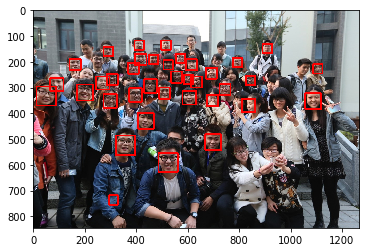

In [ ]:
#案例2：下载图片
!wget http://5b0988e595225.cdn.sohucs.com/images/20180513/0b958761ba0f4b99b35747ac656f4ec4.jpeg -O Jack_Ma_schoolmates.jpeg
#将图片数据化赋值到img2
img2 = face_recognition.load_image_file("/content/Jack_Ma_schoolmates.jpeg") 
#识别人脸数据
face_locations_img2 = face_recognition.face_locations(img2)
#为所有人脸画框
for i in face_locations_img2:
  img2_detect = cv2.rectangle(img2, (i[1], i[0]), (i[3], i[2]), (255,0,0), 5)
#输出效果图像
plt.imshow(img2_detect)
#统计出一共多少人脸数
print("图像总人脸数：", len(face_locations_img2))

以上例子就能发现，这人脸识别并不完美：
> 部分同学未被识别入框，且前排蓝色衣服同学某衣服处竟然被错认为是人脸！

为什么会这样子？是因为本项目的人脸识别是基于C++开源库dlib中的深度学习模型，用[Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)人脸数据集进行训练，这个库的人脸数据几乎都是外国成人…… 因此，

> **此人脸识别模型对亚洲人和小孩脸的识别准确率尚待提升**。

##（二）**人脸关键部位定点**


以下教你如何一步步定位人脸关键部位并画出定点

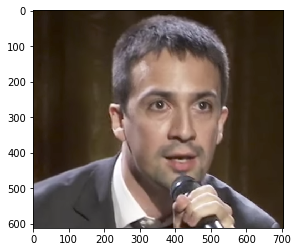

In [ ]:
lin = face_recognition.load_image_file("/content/face_recognition/examples/lin-manuel-miranda.png") 
#将导入的原图描绘出来
plt.imshow(lin)

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(lin)

face_recognition的face_landmarks模块识别面部的精度为9组共72个坐标点：

通过以下代码，我们可以将这些点统计出来：

In [ ]:
print("下唇", len(face_landmarks_list[0]['bottom_lip']))
print("上唇", len(face_landmarks_list[0]['top_lip']))
print("右眼", len(face_landmarks_list[0]['right_eye']))
print("左眼", len(face_landmarks_list[0]['left_eye']))
print("右眉毛", len(face_landmarks_list[0]['right_eyebrow']))
print("左眉毛", len(face_landmarks_list[0]['left_eyebrow']))
print("鼻梁", len(face_landmarks_list[0]['nose_bridge']))
print("鼻尖", len(face_landmarks_list[0]['nose_tip']))
print("下巴", len(face_landmarks_list[0]['chin']))


下唇 12
上唇 12
右眼 6
左眼 6
右眉毛 5
左眉毛 5
鼻梁 4
鼻尖 5
下巴 17


In [ ]:
face_landmarks_list #查看所有脸部特质的定点数据

[{'bottom_lip': [(460, 414),
   (446, 432),
   (432, 439),
   (418, 441),
   (404, 440),
   (386, 433),
   (367, 414),
   (377, 416),
   (405, 421),
   (418, 422),
   (431, 420),
   (451, 416)],
  'chin': [(258, 285),
   (257, 323),
   (260, 361),
   (267, 399),
   (282, 433),
   (307, 462),
   (339, 485),
   (375, 504),
   (413, 506),
   (446, 497),
   (468, 474),
   (488, 448),
   (502, 421),
   (511, 389),
   (516, 356),
   (522, 322),
   (524, 288)],
  'left_eye': [(332, 274),
   (347, 261),
   (366, 261),
   (380, 275),
   (366, 280),
   (347, 281)],
  'left_eyebrow': [(300, 258), (318, 236), (344, 224), (373, 225), (401, 233)],
  'nose_bridge': [(422, 268), (424, 294), (427, 320), (429, 347)],
  'nose_tip': [(393, 362), (408, 367), (424, 372), (436, 367), (446, 362)],
  'right_eye': [(448, 276),
   (465, 262),
   (483, 262),
   (495, 275),
   (484, 282),
   (466, 281)],
  'right_eyebrow': [(441, 234),
   (465, 226),
   (488, 225),
   (510, 235),
   (517, 257)],
  'top_lip': [(367

通过以下代码可以在原图上将这些关键点画出来：（讲解[circle函数传送门](https://makeronsite.com/opencv-python-draw-circle.html)）

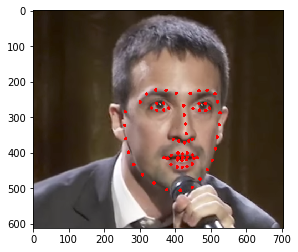

In [ ]:
for ppl in face_landmarks_list:  #为所有人脸画点
  for key, value in ppl.items():  #为关键位画点
    for v in value:  #为关键位的所有坐标画点
      lin = cv2.circle(lin, (v[0], v[1]),2, (255,0,0), thickness=5)
#输出效果图像
plt.imshow(lin)

以上72个红点组成的数据组就是我们机器视角认知我们人脸的方式。

##（三）**人脸关键位修饰**

识别人脸关键点在很多领域都有用处，但同样你也可以把这个功能玩坏，比如digital make-up就是自动化妆案例（就像美图秀秀一样）。